<a href="https://colab.research.google.com/github/Pradeepa19976/customerconversion/blob/main/Customer_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

#for data  visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
#to read data from csv file
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.dtypes #types of data

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df.isnull().sum() #checking null values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,4


In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['age', 'day', 'dur', 'num_calls']

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [ ]:
for i in integer_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" int64.')

Column "age" is divided into "77" int64.
Column "day" is divided into "31" int64.
Column "dur" is divided into "1573" int64.
Column "num_calls" is divided into "48" int64.


In [ ]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "mon" is divided into "12" categories.
Column "prev_outcome" is divided into "4" categories.
Column "y" is divided into "2" categories.


In [ ]:
df = df.drop_duplicates()

In [ ]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
 df['job'] =df['job'].replace('unknown',np.nan)

<ipython-input-15-4e38eb43924b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] =df['job'].replace('unknown',np.nan)


In [ ]:
 df.job.isnull().sum()

288

In [ ]:
df=df.dropna(subset=['job'])

In [ ]:
df.job.isnull().sum()

0

In [ ]:
df['mon'].value_counts()

may    13734
jul     6863
aug     6182
jun     5249
nov     3956
apr     2925
feb     2636
jan     1388
oct      727
sep      570
mar      474
dec      213
Name: mon, dtype: int64

In [ ]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [ ]:
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)

<ipython-input-21-3a87af3ddc33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual'] =df['education_qual'].replace('unknown',np.nan)


In [ ]:
df.education_qual.isnull().sum()

1730

In [ ]:
df = df. dropna(subset=['education_qual'])

In [ ]:
df.education_qual.isnull().sum()

0

In [ ]:
df.call_type.value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [ ]:
df['prev_outcome'].value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [ ]:
df['y'].value_counts()

no     38166
yes     5021
Name: y, dtype: int64

In [ ]:
df['target'] = df["y"].map({"yes":1 , "no": 0})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no,0
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no,0


In [ ]:
df['y'].value_counts()

no     38166
yes     5021
Name: y, dtype: int64

In [ ]:
df.shape

(43187, 12)

Outlier -Age

<Axes: xlabel='age'>

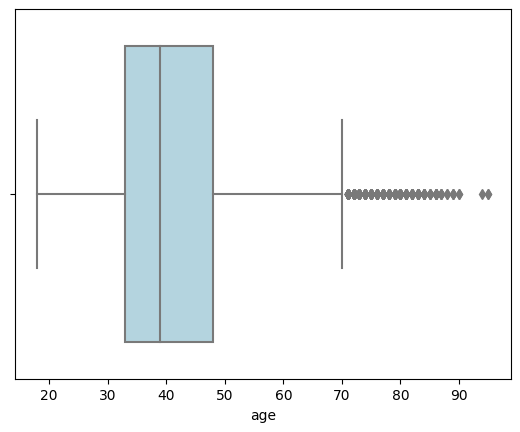

In [ ]:
sns.boxplot(x=df['age'], color='lightblue')

In [ ]:
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


Removing outlier for Age

In [ ]:
df.age = df.age.clip(10.5,70.5)

In [ ]:
df.age.describe()

count    43187.000000
mean        40.702549
std         10.305239
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

Checking- After outlier removal

<Axes: xlabel='age'>

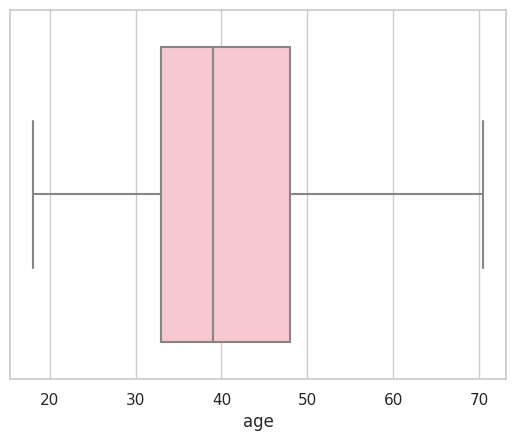

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='pink')

Outlier - Day

<Axes: xlabel='day'>

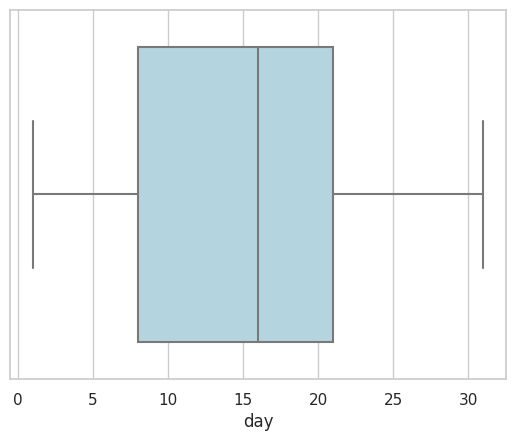

In [ ]:
sns.boxplot(x=df['day'], color='lightblue')

IQR

In [ ]:
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


In [ ]:
df.day.describe()

count    43187.000000
mean        15.809896
std          8.305826
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

Outlier - Duration

<Axes: xlabel='dur'>

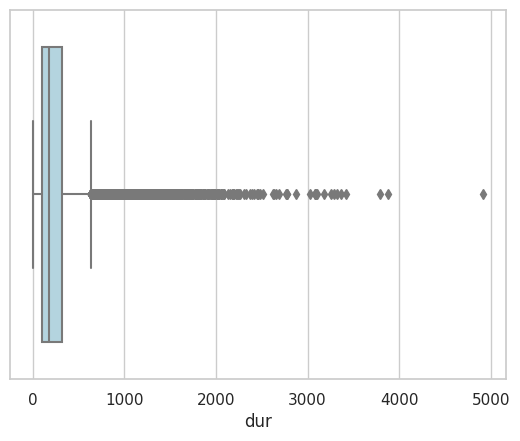

In [ ]:
sns.boxplot(x=df['dur'], color='lightblue')

IQR

In [ ]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


In [ ]:
df.dur = df.dur.clip(-219.5,640.5)

In [ ]:
df.dur.describe()

count    43187.000000
mean       234.788038
std        176.240001
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

<Axes: xlabel='dur'>

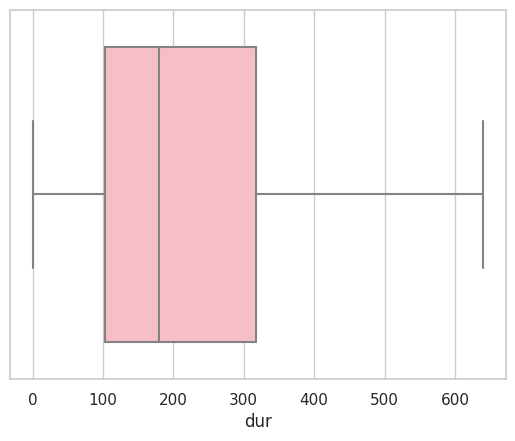

In [ ]:
#After Outlier - Duration
sns.boxplot(x=df['dur'], color='lightpink')

Outlier - No.of.calls

<Axes: xlabel='num_calls'>

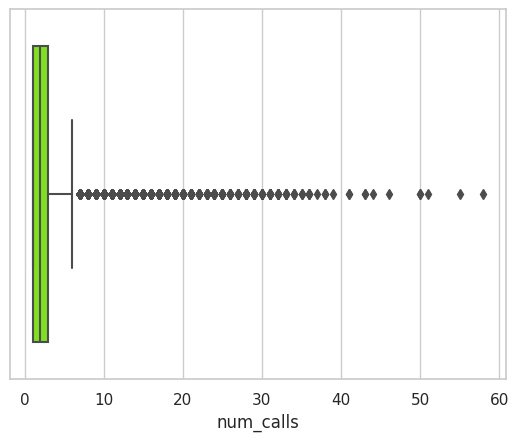

In [ ]:
sns.boxplot(x=df['num_calls'], color='Chartreuse')

IQR

In [ ]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [ ]:
df.num_calls = df.num_calls.clip(-2,6.0)

In [ ]:
df.num_calls.describe()

count    43187.000000
mean         2.393081
std          1.598892
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<Axes: xlabel='num_calls'>

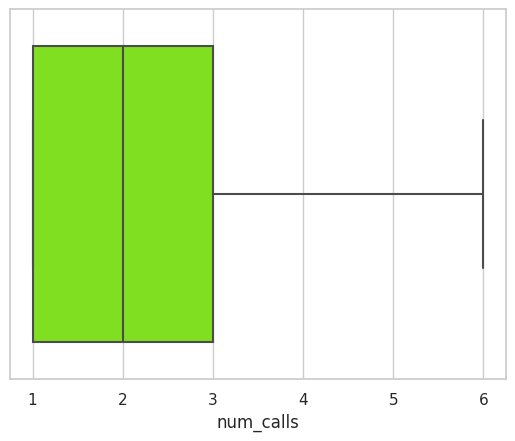

In [ ]:
#After Removing Outlier
sns.boxplot(x=df['num_calls'], color='Chartreuse')

Data Visulaization


In [ ]:
df['job'].value_counts().index[::-1]

Index(['student', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed',
       'retired', 'services', 'admin.', 'technician', 'management',
       'blue-collar'],
      dtype='object')

In [ ]:
df['mon'].value_counts().index[::-1]

Index(['dec', 'mar', 'sep', 'oct', 'jan', 'feb', 'apr', 'nov', 'jun', 'aug',
       'jul', 'may'],
      dtype='object')

In [ ]:
df['education_qual'].value_counts().index[::-1]

Index(['primary', 'tertiary', 'secondary'], dtype='object')

In [ ]:
df.describe()

,age,day,dur,num_calls,target
count,43187.000000,43187.000000,43187.000000,43187.000000,43187.000000
mean,40.702549,15.809896,234.788038,2.393081,0.116262
std,10.305239,8.305826,176.240001,1.598892,0.320542
min,18.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,21.000000,318.000000,3.000000,0.000000
max,70.500000,31.000000,640.500000,6.000000,1.000000


In [ ]:
!pip install seaborn==0.11

In [ ]:
#for data  visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

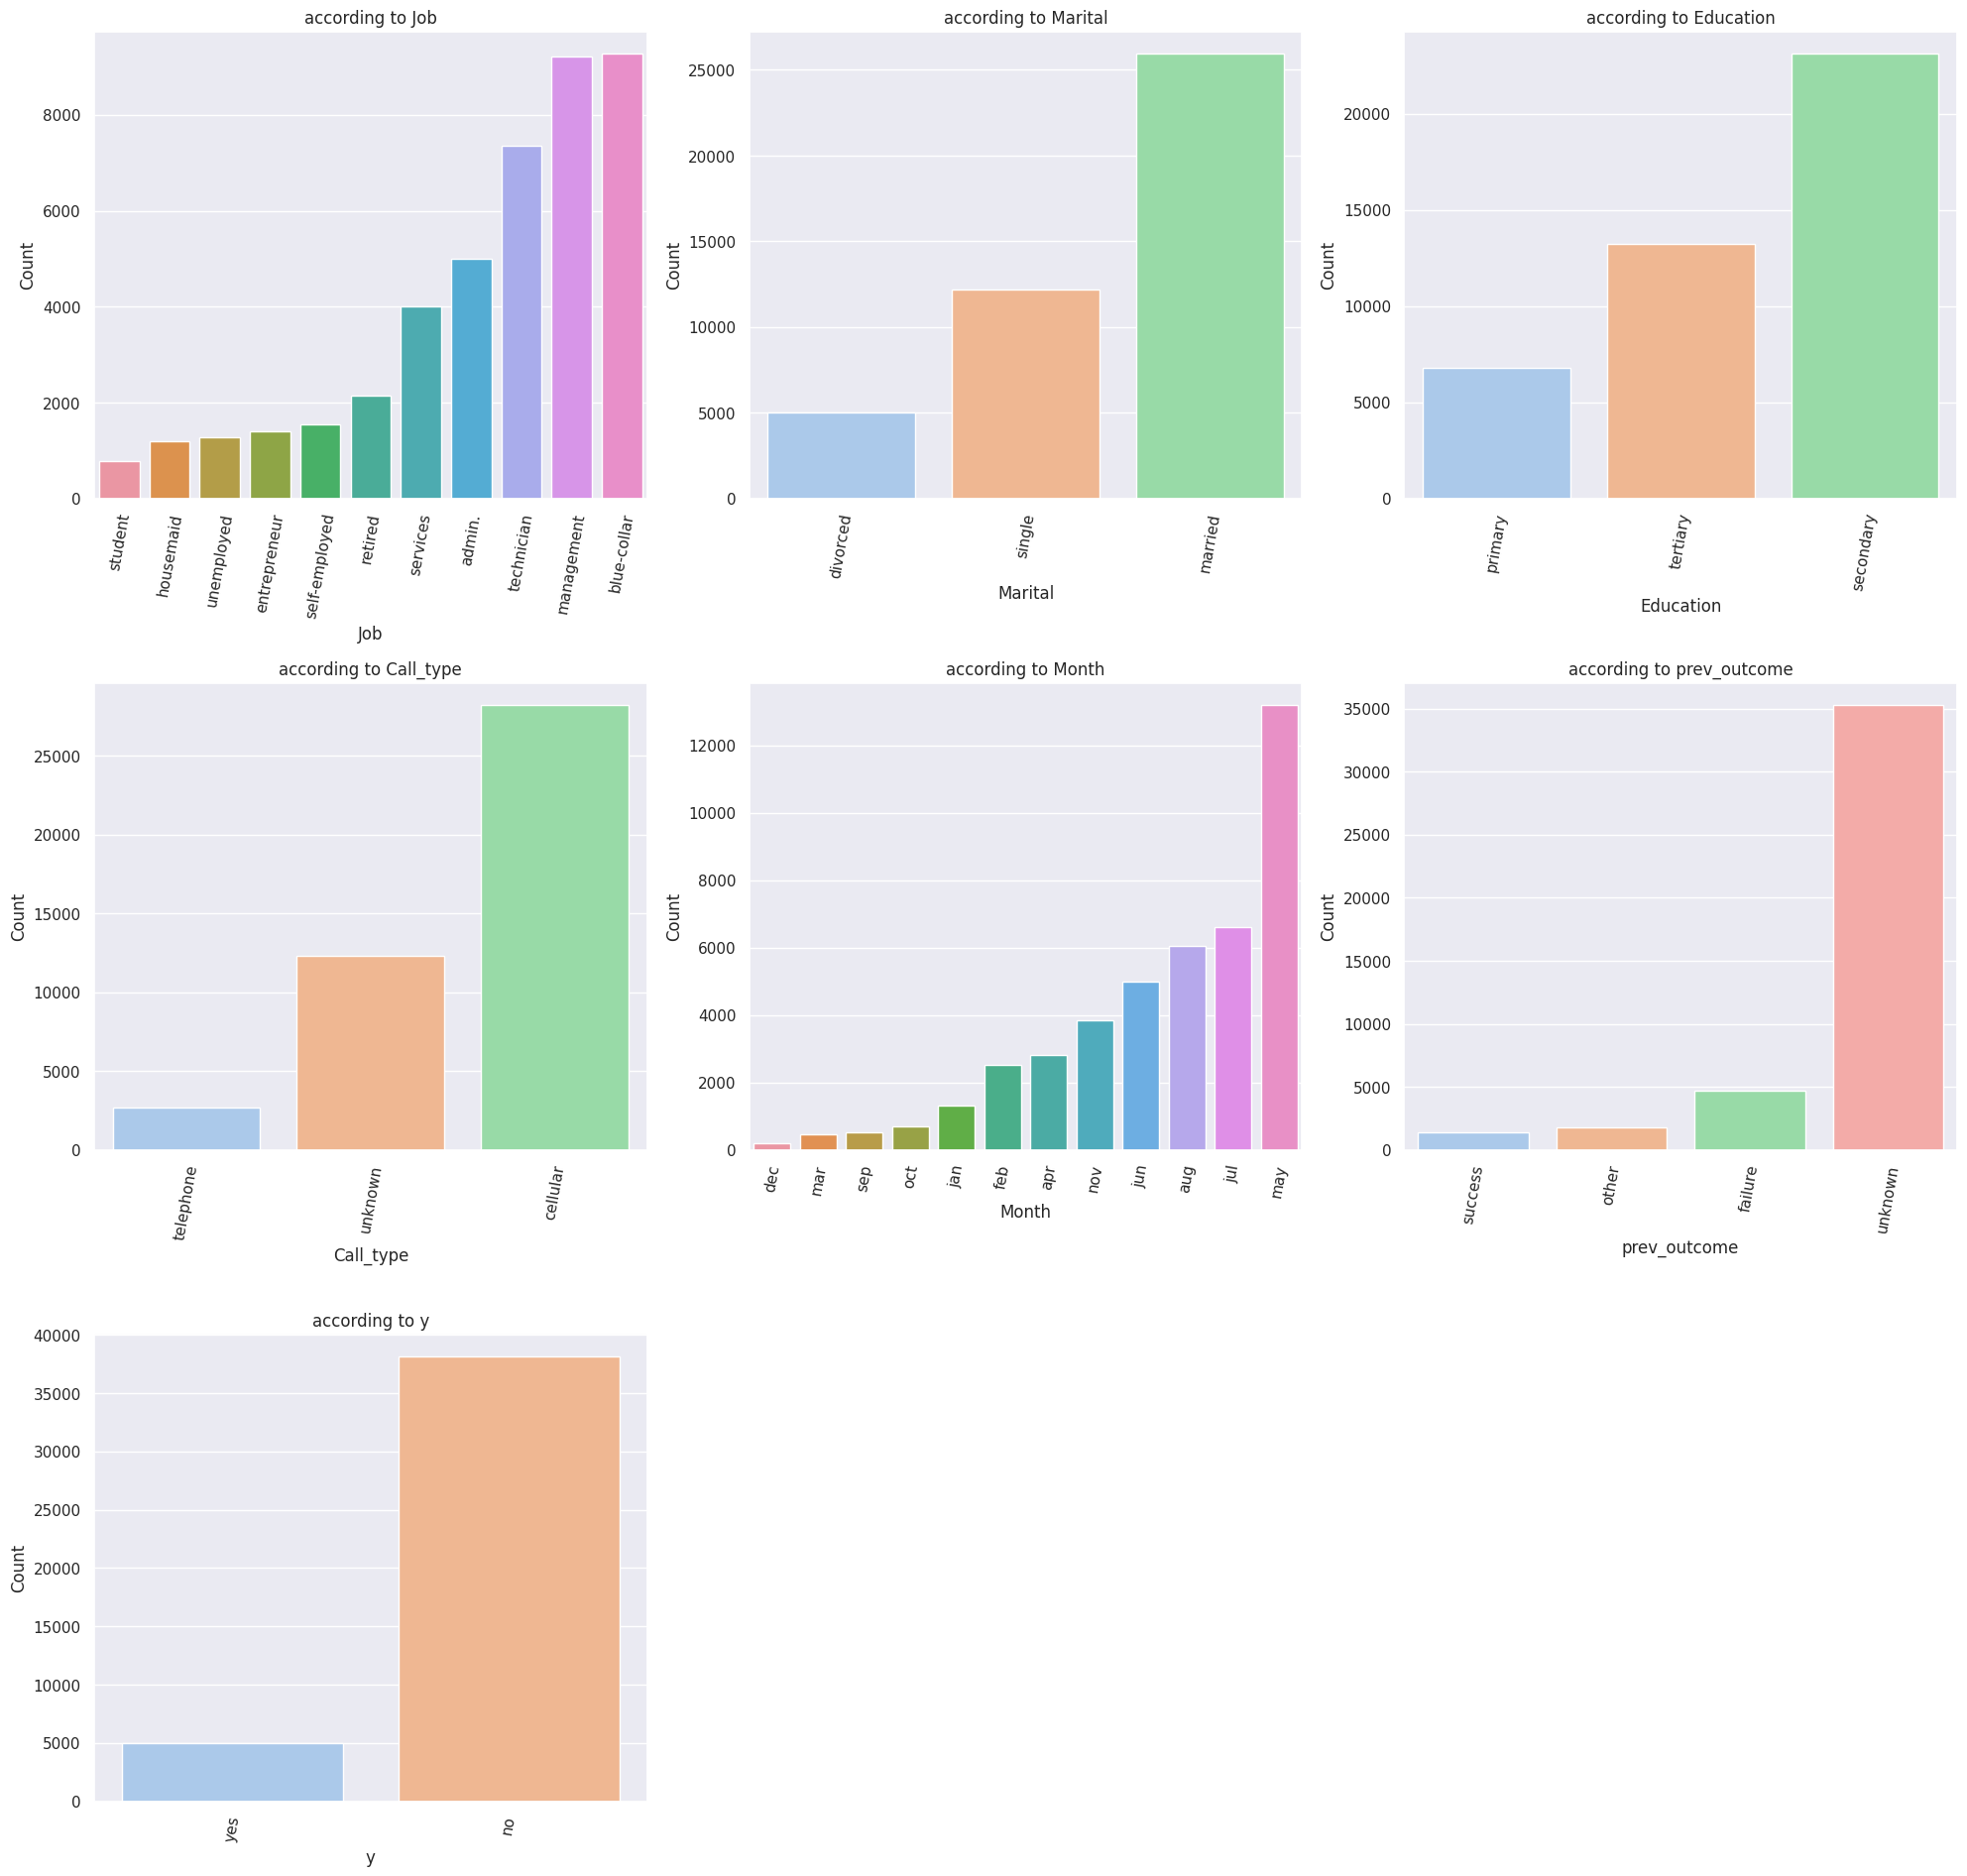

In [ ]:
#for ploting
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=80)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('according to Job')

plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=80)
plt.xlabel('Marital')
plt.ylabel('Count')
plt.title('according to Marital')

plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=80)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('according to Education')

plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=80)
plt.xlabel('Call_type')
plt.ylabel('Count')
plt.title('according to Call_type')

plt.subplot(435)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=80)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('according to Month')

plt.subplot(436)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=80)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('according to prev_outcome')

plt.subplot(437)
sns.countplot(df['y'],order=df['y'].value_counts().index[::-1])
plt.xticks(rotation=80)
plt.xlabel('y')
plt.ylabel('Count')
plt.title('according to y')

plt.tight_layout()

Feature vs target variable

In [ ]:
#grouping & sorting
job_order = df.groupby('job')['target'].mean().reset_index().sort_values('target')['job']
marital_order = df.groupby('marital')['target'].mean().reset_index().sort_values('target')['marital']
eductaion_order = df.groupby('education_qual')['target'].mean().reset_index().sort_values('target')['education_qual']
call_type_order = df.groupby('call_type')['target'].mean().reset_index().sort_values('target')['call_type']
mon_order = df.groupby('mon')['target'].mean().reset_index().sort_values('target')['mon']
prev_outcome_order = df.groupby('prev_outcome')['target'].mean().reset_index().sort_values('target')['prev_outcome']

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-

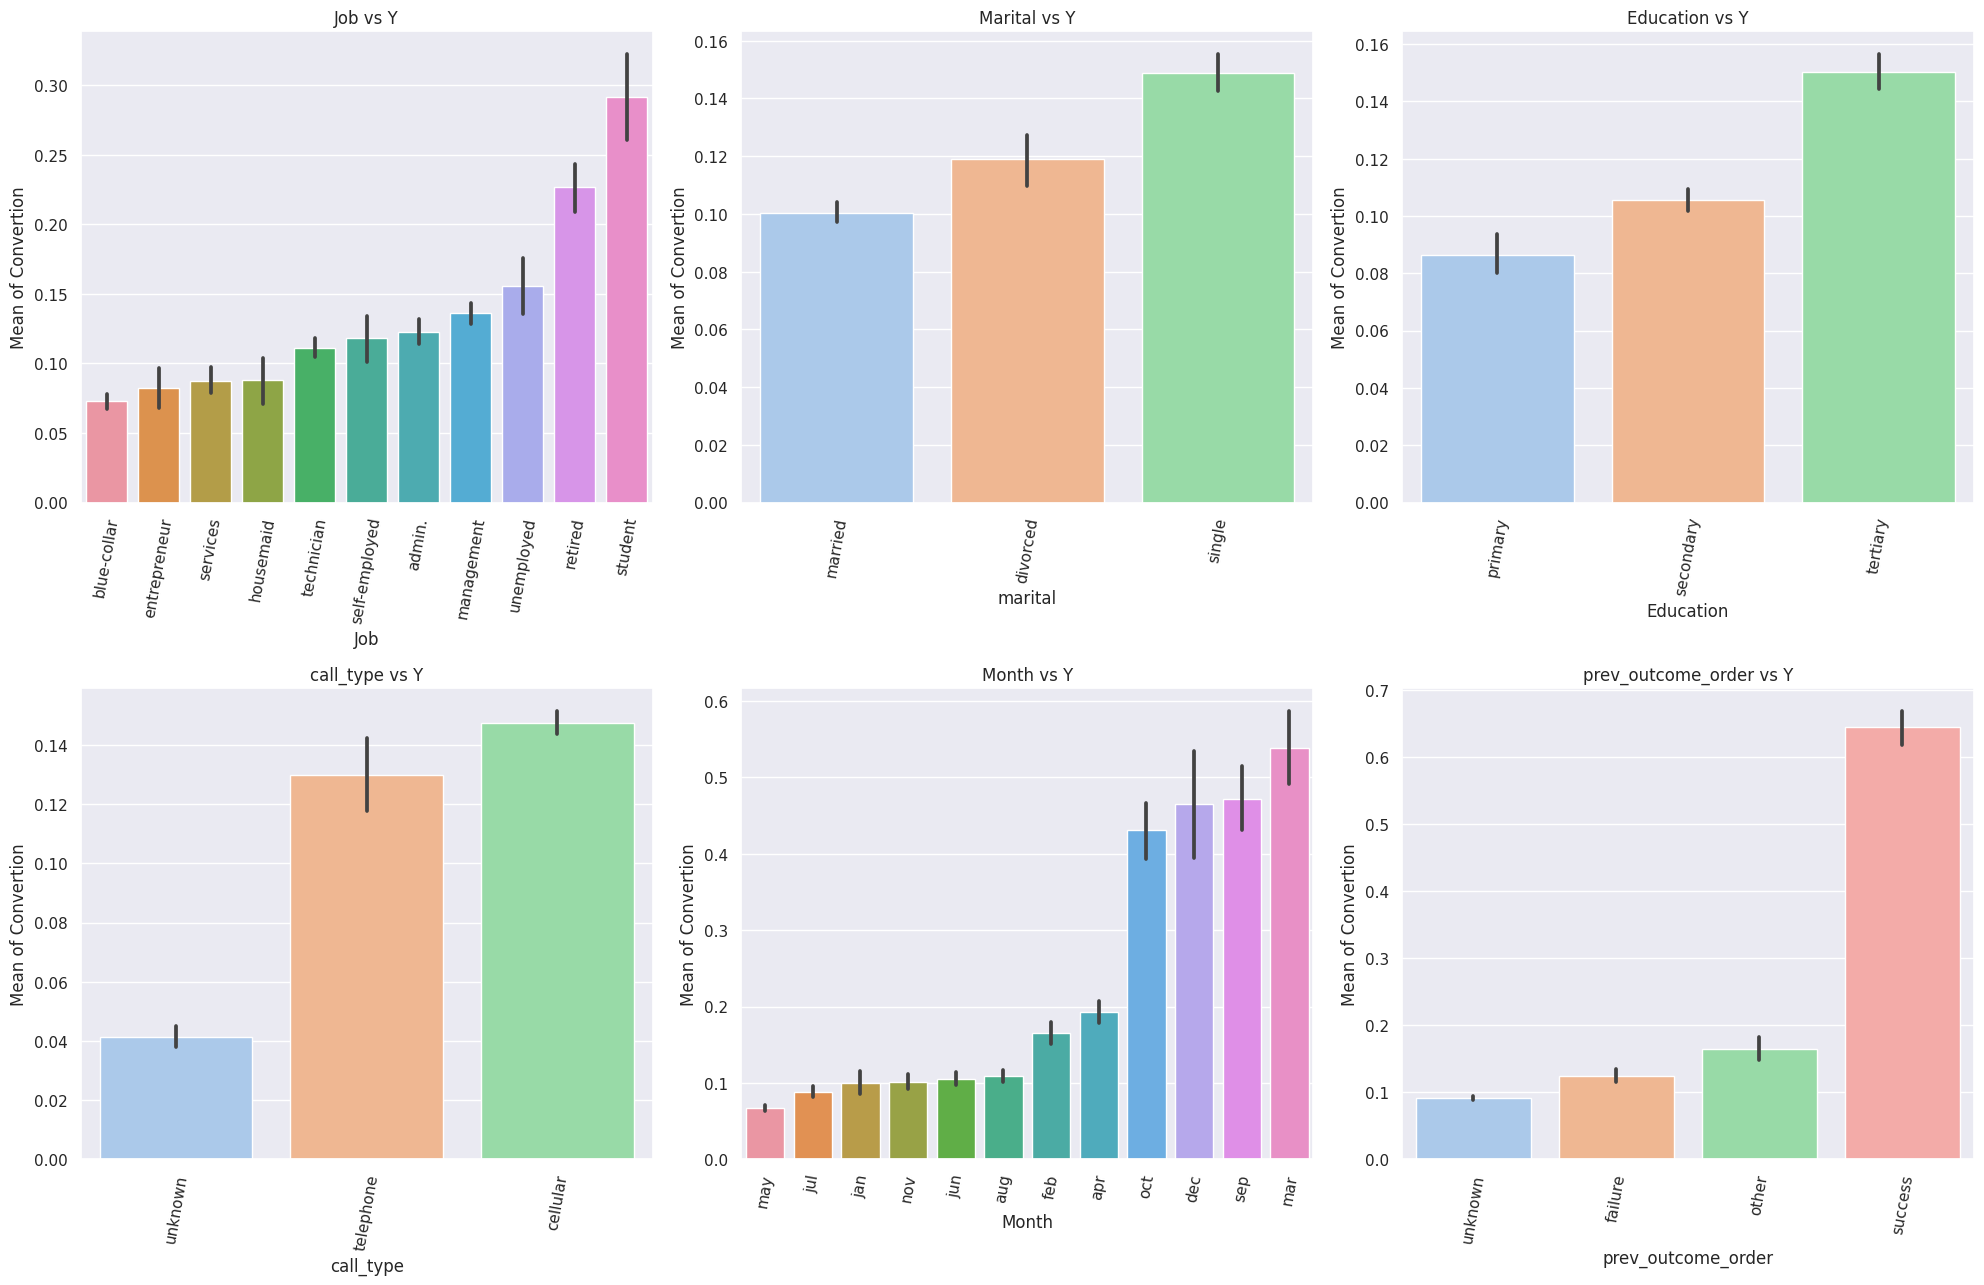

In [ ]:
#for ploting
# sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.barplot(df['job'],df['target'],order=job_order)
plt.xticks(rotation=80)
plt.xlabel('Job')
plt.ylabel('Mean of Convertion')
plt.title('Job vs Y')

plt.subplot(432)
sns.barplot(df['marital'],df['target'],order=marital_order)
plt.xticks(rotation=80)
plt.xlabel('marital')
plt.ylabel('Mean of Convertion')
plt.title('Marital vs Y')

plt.subplot(433)
sns.barplot(df['education_qual'],df['target'],order=eductaion_order)
plt.xticks(rotation=80)
plt.xlabel('Education')
plt.ylabel('Mean of Convertion')
plt.title('Education vs Y')

plt.subplot(434)
sns.barplot(df['call_type'],df['target'],order=call_type_order)
plt.xticks(rotation=80)
plt.xlabel('call_type')
plt.ylabel('Mean of Convertion')
plt.title('call_type vs Y')

plt.subplot(435)
sns.barplot(df['mon'],df['target'],order=mon_order)
plt.xticks(rotation=80)
plt.xlabel('Month')
plt.ylabel('Mean of Convertion')
plt.title('Month vs Y')

plt.subplot(436)
sns.barplot(df['prev_outcome'],df['target'],order=prev_outcome_order)
plt.xticks(rotation=80)
plt.xlabel('prev_outcome_order')
plt.ylabel('Mean of Convertion')
plt.title('prev_outcome_order vs Y')

plt.tight_layout()

In [ ]:
df['target']

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 43187, dtype: int64

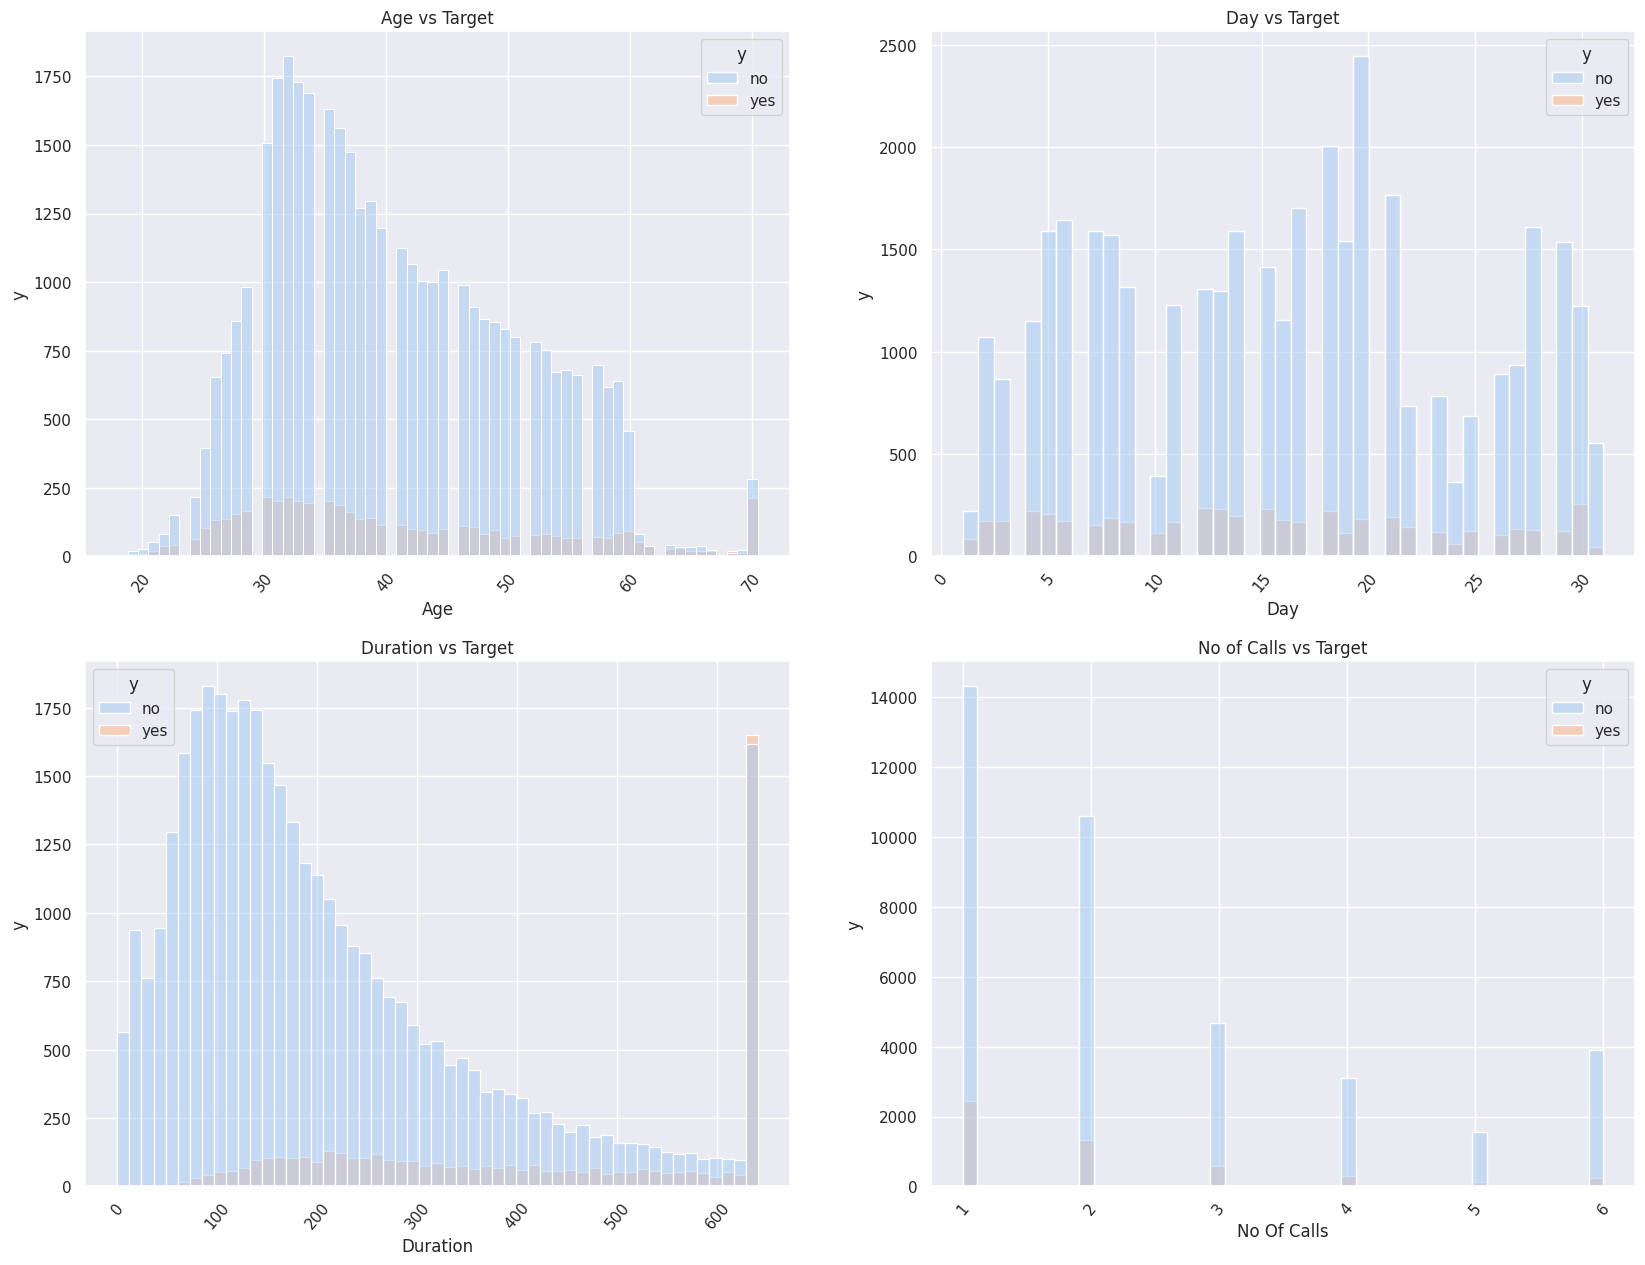

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
sns.histplot(x='age',hue='y',data=df,palette='pastel')
plt.xticks(rotation=50)
plt.title('Age vs Target')
plt.xlabel('Age')
plt.ylabel('y')

plt.subplot(2,2,2)
sns.histplot(x='day',hue='y',data=df,palette='pastel')
plt.xticks(rotation=50)
plt.title('Day vs Target')
plt.xlabel('Day')
plt.ylabel('y')

plt.subplot(2,2,3)
sns.histplot(x='dur',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Duration vs Target')
plt.xlabel('Duration')
plt.ylabel('y')

plt.subplot(2,2,4)
sns.histplot(x='num_calls',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target')
plt.xlabel('No Of Calls')
plt.ylabel('y')

plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [ ]:
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,management,married,tertiary,1,5,1,261.0,1,1,no,0
1,44.0,technician,single,secondary,1,5,1,151.0,1,1,no,0
2,33.0,entrepreneur,married,secondary,1,5,1,76.0,1,1,no,0
5,35.0,management,married,tertiary,1,5,1,139.0,1,1,no,0
6,28.0,management,single,tertiary,1,5,1,217.0,1,1,no,0


In [ ]:
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0
5,35.0,8,1,3,1,5,1,139.0,1,1,no,0
6,28.0,8,3,3,1,5,1,217.0,1,1,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,5,1,3,3,17,4,640.5,3,1,yes,1
45207,70.5,10,2,1,3,17,4,456.0,2,1,yes,1
45208,70.5,10,1,2,3,17,4,640.5,5,4,yes,1
45209,57.0,1,1,2,2,17,4,508.0,4,1,no,0


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0
5,35.0,8,1,3,1,5,1,139.0,1,1,no,0
6,28.0,8,3,3,1,5,1,217.0,1,1,no,0


Splitting the data into input data and output data



In [ ]:
x = df.drop(['y','target'],axis=1)
y = df['target']

In [ ]:
x

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58.0,8,1,3,1,5,1,261.0,1,1
1,44.0,5,3,2,1,5,1,151.0,1,1
2,33.0,2,1,2,1,5,1,76.0,1,1
5,35.0,8,1,3,1,5,1,139.0,1,1
6,28.0,8,3,3,1,5,1,217.0,1,1
...,...,...,...,...,...,...,...,...,...,...
45206,51.0,5,1,3,3,17,4,640.5,3,1
45207,70.5,10,2,1,3,17,4,456.0,2,1
45208,70.5,10,1,2,3,17,4,640.5,5,4
45209,57.0,1,1,2,2,17,4,508.0,4,1


In [ ]:
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 43187, dtype: int64

In [ ]:
# splitting the data as train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(34549, 10) (8638, 10) (34549,) (8638,)


In [ ]:
x_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
32920,32.0,6,2,1,3,17,8,232.0,2,1
3327,53.0,2,1,3,1,15,1,106.0,1,1
6907,29.0,8,1,3,1,28,1,314.0,2,1
33459,54.0,1,1,1,3,20,8,252.0,5,1
44534,70.5,10,1,2,3,12,6,350.0,1,4
...,...,...,...,...,...,...,...,...,...,...
40893,34.0,8,3,3,3,12,6,640.5,3,2
26731,47.0,8,1,3,3,20,4,133.0,4,1
12216,45.0,5,1,2,1,20,5,46.0,4,1
1811,39.0,3,1,2,1,9,1,323.0,1,1


Building Machine Learning Model

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
print(len(x_train_smt))
print(len(y_train_smt))

52565
52565


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7489002083815698

In [ ]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred


array([[0.77101229, 0.22898771],
       [0.98971831, 0.01028169],
       [0.82382597, 0.17617403],
       ...,
       [0.31049824, 0.68950176],
       [0.11539914, 0.88460086],
       [0.93869755, 0.06130245]])

In [ ]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("ROC score for logistic regression  :  ",round(log_reg_auroc,2))

ROC score for logistic regression  :   0.87


K Nearest Neighbor Regression


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8674450667353334
K value : 2 Train Score :  0.9821554266146676 Cross Value Accuracy : 0.8892111658297928
K value : 3 Train Score :  0.9649005992580615 Cross Value Accuracy : 0.8845812679713317
K value : 4 Train Score :  0.9605821364025492 Cross Value Accuracy : 0.8921053549203897
K value : 5 Train Score :  0.951127175877485 Cross Value Accuracy : 0.8908319385434101
K value : 6 Train Score :  0.9501379244744602 Cross Value Accuracy : 0.8940720087120726
K value : 7 Train Score :  0.9450584990012366 Cross Value Accuracy : 0.8939577432299043
K value : 8 Train Score :  0.9422239132502616 Cross Value Accuracy : 0.8946515171022703
K value : 9 Train Score :  0.9399220013316846 Cross Value Accuracy : 0.8937250547186817
K value : 10 Train Score :  0.9379244744601921 Cross Value Accuracy : 0.8963880305566285
K value : 20 Train Score :  0.9260344335584514 Cross Value Accuracy : 0.8940724110553194
K value : 30 Train Score :  0.9206886711690289

In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
print( "ROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.7803889789303079


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ROC on the sampled dataset :  0.5436946789725594


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "ROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
ROC on the sampled dataset :  0.7907049806460792


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train_smt, y_train_smt)
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt))
  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7823076191382098  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.8011604679920099  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8538571292685246  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.8609721297441263  Cross val score :  0.895463177546028
Depth  :  5  Training Accuracy :  0.875963093313041  Cross val score :  0.8965051124415263
Depth  :  6  Training Accuracy :  0.8893940835156473  Cross val score :  0.8947672578430111
Depth  :  7  Training Accuracy :  0.9023875202130696  Cross val score :  0.8938413319170853
Depth  :  8  Training Accuracy :  0.9178731094834967  Cross val score :  0.8914103740182826
Depth  :  9  Training Accuracy :  0.9299343669742224  Cross val score :  0.8907152590017595
Depth  :  10  Training Accuracy :  0.9377152097403215  Cross val score :  0.890832475001073
Depth  :  20  Training Accuracy :  0.9960810425187863  Cross val score :  0.8741604

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "ROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.875963093313041
ROC on the sampled dataset :  0.8644699291377116


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9201940454675164  Cross-Val score :  0.8911779537358913
Learning rate :  0.02  Train score :  0.9268144202416057  Cross-Val score :  0.8945355081326982
Learning rate :  0.03  Train score :  0.9323504232854561  Cross-Val score :  0.8981250804686495
Learning rate :  0.04  Train score :  0.9368971749262818  Cross-Val score :  0.8995139693575384
Learning rate :  0.05  Train score :  0.9413678303053362  Cross-Val score :  0.9000932095189048
Learning rate :  0.1  Train score :  0.9567582992485494  Cross-Val score :  0.8995138352431227
Learning rate :  0.11  Train score :  0.9595167887377533  Cross-Val score :  0.8993986309600446
Learning rate :  0.12  Train score :  0.9613240749548179  Cross-Val score :  0.8962722898158878
Learning rate :  0.13  Train score :  0.9643869494911063  Cross-Val score :  0.8999770664349172
Learning rate :  0.14  Train score :  0.9654903452867878  Cross-Val score :  0.8981253486974807
Learning rate :  0.15  Train score :  0.9

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [ ]:
#doing cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")
  rf.fit(x_train, y_train)
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9960810425187863  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9960810425187863  Cross val score :  0.88488814327984
Depth  :  3  Training Accuracy :  0.9960810425187863  Cross val score :  0.8907927384680361
Depth  :  4  Training Accuracy :  0.9960810425187863  Cross val score :  0.8946423325123998
Depth  :  5  Training Accuracy :  0.9960810425187863  Cross val score :  0.8969289240353054
Depth  :  6  Training Accuracy :  0.9960810425187863  Cross val score :  0.8991576703367056
Depth  :  7  Training Accuracy :  0.9960810425187863  Cross val score :  0.9020809950417185
Depth  :  8  Training Accuracy :  0.9960810425187863  Cross val score :  0.9039044141861992
Depth  :  9  Training Accuracy :  0.9960810425187863  Cross val score :  0.9054095128280976
Depth  :  10  Training Accuracy :  0.9960810425187863  Cross val score :  0.9048886041645543


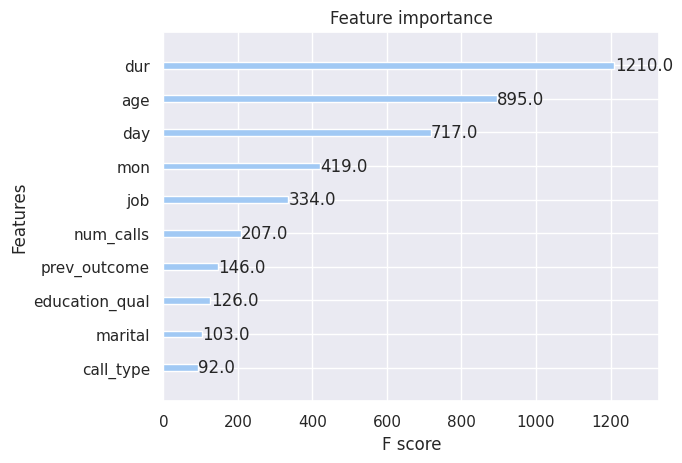

In [ ]:
from xgboost import plot_importance
plot_importance(model)
plt.show()